**Project Check-in 5**

In [ ]:
%pip install --upgrade pip
%pip install scikit-lego
%pip install seaborn
%pip install nbstripout
!nbstripout --install

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import keras
from scikeras.wrappers import KerasClassifier

df = pd.read_csv("./dataset.csv")

In [59]:
# Step 1: Clean Data
# Remove duplicates
df_cleaned = df.drop(columns='Unnamed: 0').drop_duplicates(subset=['track_id','album_name','artists','track_name'])

# Remove columns with every row unique. Also dropping artist and album because it would be too much one-hot encoding
df_cleaned.drop(columns=['track_id', 'track_name', 'artists','album_name'], inplace=True)
df_cleaned.dropna(axis=0,inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)

#The columns with object datatype will be categorical
columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
genre = df_cleaned['track_genre']
encoder = LabelEncoder()
y = encoder.fit_transform(df_cleaned['track_genre'])
df_cleaned = df_cleaned[columns]

print(y)
scaler = StandardScaler() # Scale the data so that the variances for each feature can be similarly weighted
df_cleaned = scaler.fit_transform(df_cleaned)
df_cleaned = pd.DataFrame(df_cleaned, columns=columns)

[  0   0   0 ... 112 112 112]


In [ ]:
# Neural network implementation

X = df_cleaned
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def create_model():
    model = keras.Sequential([
    keras.layers.Input(shape=(14,)), # 14 features
    keras.layers.Dense(256, activation='relu'),  # Fully connected layer with 256 units
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units
    keras.layers.Dropout(0.3),
    keras.layers.Dense(113, activation='softmax'),  # Fully connected output layer for classification with 113 units
])

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # Sparse categorical entropy since we have numerical encoding, not one-hot encoding
    
    return model

# K-fold cross-validation with 10 splits for neural network
keras_clf = KerasClassifier(build_fn=create_model, epochs=25, batch_size=16, verbose=0)

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

nn_results = cross_val_score(keras_clf, X_train, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy for each fold: {nn_results}")
print(f"Mean accuracy: {nn_results.mean():.2f}")
print(f"Standard deviation: {nn_results.std():.2f}")

(89741, 14)
(89741,)


C:\Users\tooth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\tooth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\tooth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initia

Accuracy for each fold: [0.34832869 0.34651811 0.34907369 0.34391977 0.34224822 0.34837721
 0.33918373 0.33834796 0.35213818 0.34782003]
Mean accuracy: 0.35
Standard deviation: 0.00


Epoch 1/25
4487/4487 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.1230 - loss: 3.8263 - val_accuracy: 0.2661 - val_loss: 2.9465
Epoch 2/25
4487/4487 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.2222 - loss: 3.1396 - val_accuracy: 0.2878 - val_loss: 2.7946
Epoch 3/25
4487/4487 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.2482 - loss: 3.0065 - val_accuracy: 0.3036 - val_loss: 2.7103
Epoch 4/25
4487/4487 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.2595 - loss: 2.9310 - val_accuracy: 0.3156 - val_loss: 2.6409
Epoch 5/25
4487/4487 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.2702 - loss: 2.8755 - val_accuracy: 0.3221 - val_loss: 2.6119
Epoch 6/25
4487/4487 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.2766 - loss: 2.8477 - val_accuracy: 0.3276 - val_loss: 2.5802
Epoch 7/25
4487/4487 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.2832 - loss: 2.8101 - val_accuracy: 0.3329 - val_loss: 2.5648
Epoch 8/25
4487/4487 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.2867 - loss: 2.8068 -

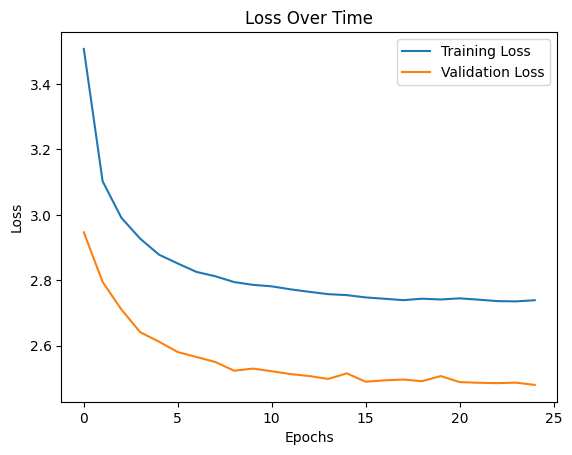

561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[ 4 83 42 ... 20 81 78]
(17949,)
Accuracy: 0.35183018552565604
       Real Value  Predicted Value
3462          108              106
13989          71               71
16886          13               24
12972          11              101
13395          41               50
2755           85                2
2650           64               64
4469           16               16
5075           48               15
11265          75               45


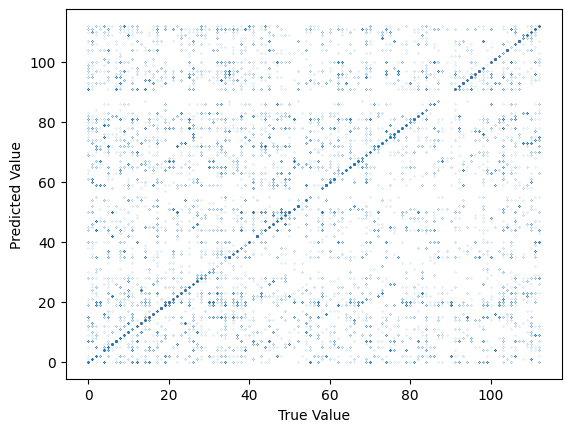

In [62]:
# Train neural network on full training set

model = create_model()
history = model.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_test, y_test))
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.legend()
plt.show()

# Generate predictions
predictions = np.argmax(model.predict(X_test), axis=1) # Take neuron with highest output to be the classified genre
print(predictions)
print(predictions.shape)
print("Accuracy:", accuracy_score(y_test, predictions))

# Create a DataFrame to compare predictions with real values
comparison_df = pd.DataFrame({
    'Real Value': y_test,
    'Predicted Value': predictions
})
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.scatter(y_test, predictions, s=0.01)
# Display a sample of the table
print(comparison_df.sample(10))  # Show 10 random samples

In [63]:
# Random Forest on Dataset

y_rf = genre
clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, min_samples_split=5)
X_train, X_test, y_train, y_test = train_test_split(X, y_rf, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_from_training = clf.predict(X_train)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Training accuracy:", metrics.accuracy_score(y_train, y_pred_from_training))

Accuracy: 0.44063736141289206
Training accuracy: 0.900922108312904


In [64]:
# K-fold cross validation with 10 splits for Random Forest

rf_results = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print(f"Accuracy for each fold: {rf_results}")
print(f"Mean accuracy: {rf_results.mean():.2f}")
print(f"Standard deviation: {rf_results.std():.2f}")

Accuracy for each fold: [0.43077994 0.43245125 0.4351581  0.42568603 0.42582532 0.43460092
 0.43265079 0.43487951 0.43320797 0.43975484]
Mean accuracy: 0.43
Standard deviation: 0.00
